# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for classifying qwerties
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202201

In [1]:
# import libraries
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
from IPython import display

# display.set_matplotlib_formats('svg')


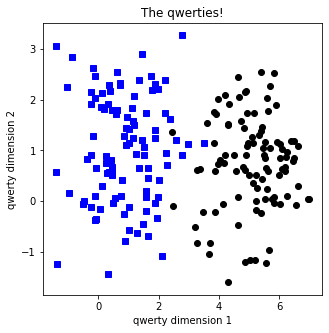

In [3]:
# create data

nPerClust = 100
blur = 1

A = [1, 1]
B = [5, 1]

# generate data
a = np.array(
    [A[0] + np.random.randn(nPerClust) * blur, A[1] + np.random.randn(nPerClust) * blur]
)
b = np.array(
    [B[0] + np.random.randn(nPerClust) * blur, B[1] + np.random.randn(nPerClust) * blur]
)

# true labels
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

# concatanate into a matrix
data_np = np.hstack((a, b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5, 5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1], "bs")
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1], "ko")
plt.title("The qwerties!")
plt.xlabel("qwerty dimension 1")
plt.ylabel("qwerty dimension 2")
plt.show()


In [4]:
# inspect types
print(type(data_np))
print(np.shape(data_np))
print(" ")

print(type(data))
print(np.shape(data))


<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


In [ ]:
# build the model
ANNclassify = nn.Sequential(
    nn.Linear(2, 1),  # input layer
    nn.ReLU(),  # activation unit
    nn.Linear(1, 1),  # output unit
    nn.Sigmoid(),  # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
)

ANNclassify


In [ ]:
# other model features

learningRate = 0.01

# loss function
lossfun = nn.BCELoss()
# Note: You'll learn in the "Metaparameters" section that it's better to use BCEWithLogitsLoss, but this is OK for now.

# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)


In [ ]:
# train the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

    # forward pass
    yHat = ANNclassify(data)

    # compute loss
    loss = lossfun(yHat, labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


In [ ]:
# show the losses

plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=0.1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [ ]:
# compute the predictions

# manually compute losses
# final forward pass
predictions = ANNclassify(data)

predlabels = predictions > 0.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100 - 100 * len(misclassified) / (2 * nPerClust)

print("Final accuracy: %g%%" % totalacc)


In [ ]:
# plot the labeled data
fig = plt.figure(figsize=(5, 5))
plt.plot(
    data[misclassified, 0],
    data[misclassified, 1],
    "rx",
    markersize=12,
    markeredgewidth=3,
)
plt.plot(data[np.where(~predlabels)[0], 0], data[np.where(~predlabels)[0], 1], "bs")
plt.plot(data[np.where(predlabels)[0], 0], data[np.where(predlabels)[0], 1], "ko")

plt.legend(["Misclassified", "blue", "black"], bbox_to_anchor=(1, 1))
plt.title(f"{totalacc}% correct")
plt.show()


# Additional explorations

In [ ]:
# 1) It is common in DL to train the model for a specified number of epochs. But you can also train until
#    the model reaches a certain accuracy criterion. Re-write the code so that the model continues training
#    until it reaches 90% accuracy.
#    What would happen if the model falls into a local minimum and never reaches 90% accuracy? Yikes! You can
#    force-quit a process in google-colab by clicking on the top-left 'play' button of a code cell.
# 
# 2) It is intuitive that the model can reach 100% accuracy if the qwerties are more separable. Modify the 
#    qwerty-generating code to get the model to have 100% classification accuracy.
# 

## Train until model reaches certain accuracy
 1) It is common in DL to train the model for a specified number of epochs. But you can also train until
    the model reaches a certain accuracy criterion. Re-write the code so that the model continues training
    until it reaches 90% accuracy.

In [19]:
epoch_numbers_to_reach_90 = []

for i in range(100):

    totalacc = 0
    totalacc_arr = []

    # build the model
    ANNclassify = nn.Sequential(
        nn.Linear(2, 1),  # input layer
        nn.ReLU(),  # activation unit
        nn.Linear(1, 1),  # output unit
        nn.Sigmoid(),  # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
    )

    # other model features
    learningRate = 0.01

    # loss function
    lossfun = nn.BCELoss()

    # optimizer
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

    # train the model
    losses = []

    epoch_cnt = 0

    while totalacc < 96:

        # forward pass
        yHat = ANNclassify(data)

        # compute loss
        loss = lossfun(yHat, labels)
        losses.append(loss)

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # compute the predictions

        # manually compute losses
        # final forward pass
        predictions = ANNclassify(data)

        predlabels = predictions > 0.5

        # find errors
        misclassified = np.where(predlabels != labels)[0]

        # total accuracy
        totalacc = 100 - 100 * len(misclassified) / (2 * nPerClust)
        totalacc_arr = np.append(totalacc_arr, totalacc)

        epoch_cnt += 1

        if epoch_cnt > 20_000:
            print('Break loop on 20,000 epochs')
            break

        # print("Final accuracy: %g%%" % totalacc)

    # plt.plot(totalacc_arr)
    epoch_numbers_to_reach_90.append(epoch_cnt)

Break loop on 20,000 epochs
Break loop on 20,000 epochs
Break loop on 20,000 epochs
Break loop on 20,000 epochs
Break loop on 20,000 epochs
Break loop on 20,000 epochs
Break loop on 20,000 epochs
Break loop on 20,000 epochs
Break loop on 20,000 epochs
Break loop on 20,000 epochs
Break loop on 20,000 epochs
Break loop on 20,000 epochs
Break loop on 20,000 epochs
Break loop on 20,000 epochs
Break loop on 20,000 epochs
Break loop on 20,000 epochs
Break loop on 20,000 epochs


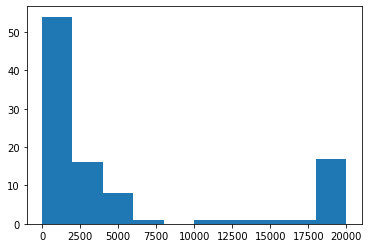

In [23]:
plt.hist(epoch_numbers_to_reach_90)
plt.show()